# Goal & setup
**Goal:** Load data, check quality, inspect distributions/outliers, and persist clean artifacts (interim data + plots).

In [3]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Laden der Datensätze

In [ ]:
# Pfade zu den Daten
DATA_DIR_COMP = Path('Dataset Competition')
DATA_DIR_OG = Path('Dataset Original')
# Laden der Daten
df_comp_train = pd.read_csv(DATA_DIR_COMP / 'train_values.csv')
df_comp_test = pd.read_csv(DATA_DIR_COMP / 'test_values.csv')
df_comp_labels = pd.read_csv(DATA_DIR_COMP / 'train_labels.csv')
df_og_damage = pd.read_csv(DATA_DIR_OG / 'csv_building_damage_assessment.csv')
df_og_structure = pd.read_csv(DATA_DIR_OG / 'csv_building_structure.csv')
df_og_ownership = pd.read_csv(DATA_DIR_OG / 'csv_building_ownership_and_use.csv')
# Zusammenführen der Daten
df_og = pd.merge(df_og_structure, df_og_ownership, on='building_id')
# Entfernen doppelter Spalten
df_og.drop(['district_id_y', 'vdcmun_id_y', 'ward_id_y'], axis=1, inplace=True)
# df_og = pd.merge(df_og, df_og_ownership, on='building_id')

/var/folders/0x/mmpw_pbd0zl7qptfw7jdkhg40000gn/T/ipykernel_1124/3210958780.py:8: DtypeWarning: Columns (5,17,29,34,35,36,37,38,39,40,41,42,43,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df_og_damage = pd.read_csv(DATA_DIR_OG / 'csv_building_damage_assessment.csv')


## Vergleichen der Spalten des originalen und des Wettbewerbsdatensatzes

In [ ]:
# Spalten des originalen Datensatzes
print(df_og.columns)
print(df_og["position"].unique())


Index(['building_id', 'district_id_x', 'vdcmun_id_x', 'ward_id_x',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hot

In [ ]:
# Spalten des Wettbewerbsdatensatzes
print(df_comp_train.columns)

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
# Anzeigen der ersten Zeilen des originalen Datensatzes
df_og.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Anzeigen der ersten Zeilen des Wettbewerbsdatensatzes
df_comp_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Größe der Datensätze
print(df_og.shape)
print(df_comp_train.shape)
print(df_comp_test.shape)

(762106, 44)
(260601, 39)
(86868, 39)


## Überprüfen auf leere Werte

In [ ]:
df_og.isnull().sum()

building_id                                0
district_id_x                              0
vdcmun_id_x                                0
ward_id_x                                  0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [ ]:
df_comp_train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

## Überprüfen auf Duplikate

In [ ]:
print(df_comp_train.shape)
# Entfernen von Duplikaten
df_comp_train_wo_duplicates = df_comp_train.drop_duplicates()
print(df_comp_train_wo_duplicates.shape)

(260601, 39)
(260601, 39)


## Ausreißer identifizieren

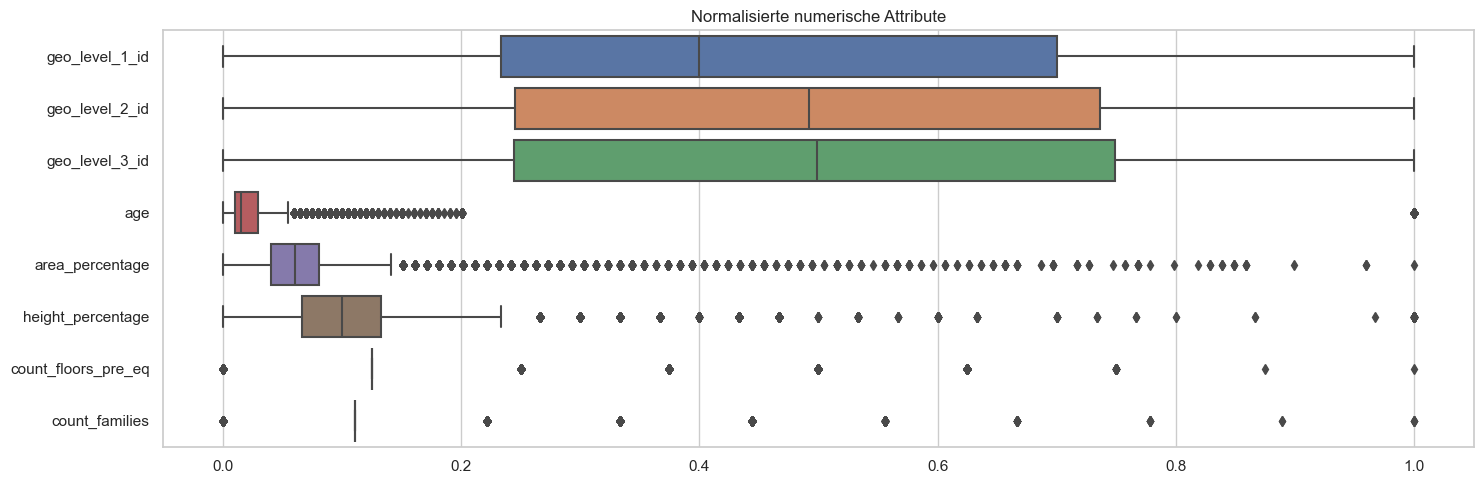

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Numerische Attribute auswählen
numeric_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq', 'count_families']

# Daten normalisieren
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_comp_train[numeric_columns]), columns=numeric_columns)

# Stil für die Plots setzen
sns.set(style="whitegrid")

# Boxplot der normalisierten numerischen Attribute
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_normalized, orient="h")

# Titel hinzufügen
plt.title('Normalisierte numerische Attribute')

# Plot anzeigen
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

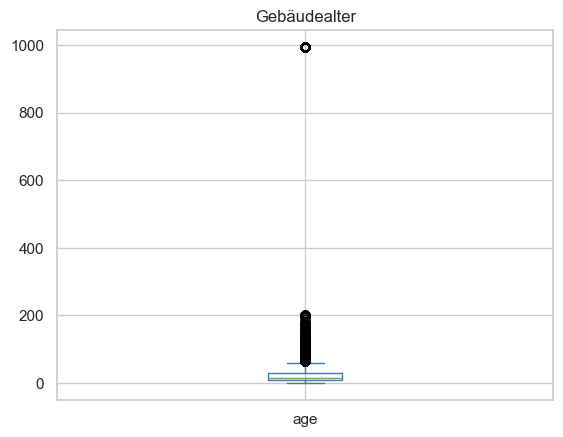

In [ ]:
df_comp_train["age"].plot(kind = "box", title = "Gebäudealter")
plt.show
# df_comp_train["geo_level_1_id"].plot(kind = "box", title = "geo_level_1_id")
# plt.show
# df_comp_train["geo_level_2_id"].plot(kind = "box", title = "geo_level_2_id")
# plt.show
# df_comp_train["geo_level_3_id"].plot(kind = "box", title = "geo_level_3_id")
# plt.show
# df_comp_train["count_floors_pre_eq"].plot(kind = "box", title = "Etagenanzahl")
# plt.show
# df_comp_train["area_percentage"].plot(kind = "box", title = "Grundfläche")
# plt.show
# df_comp_train["height_percentage"].plot(kind = "box", title = "Höhe")
# plt.show

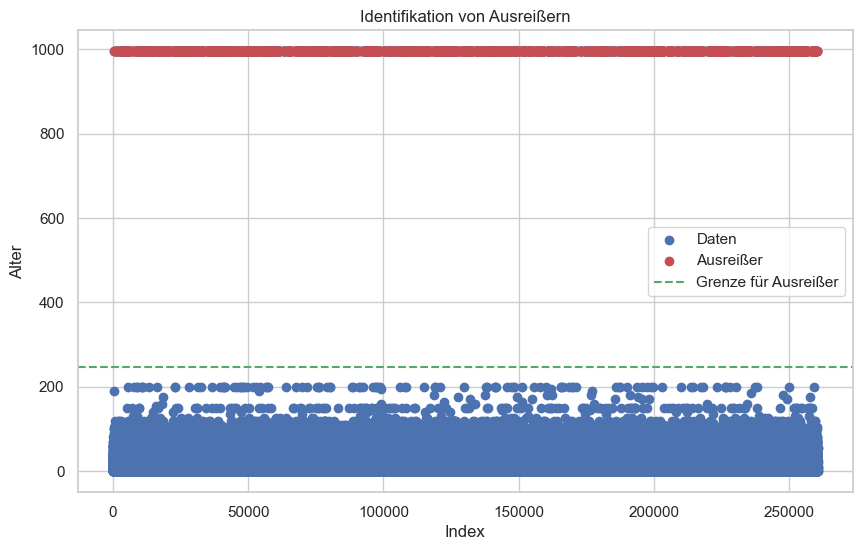

In [ ]:
# Berechnung von Durchschnitt und Standardabweichung
mean_value = df_comp_train['age'].mean()
std_dev = df_comp_train['age'].std()

# Festlegen einer Grenze für Ausreißer (z.B., 3-fache Standardabweichung)
outlier_limit = mean_value + 3 * std_dev

# Identifizieren von Ausreißern
outliers = df_comp_train[df_comp_train['age'] > outlier_limit]

# Visualisierung der Daten mit Ausreißern
plt.figure(figsize=(10, 6))
plt.scatter(df_comp_train.index, df_comp_train['age'], label='Daten')
plt.scatter(outliers.index, outliers['age'], color='r', label='Ausreißer')
plt.axhline(y=outlier_limit, color='g', linestyle='--', label='Grenze für Ausreißer')
plt.legend()
plt.title('Identifikation von Ausreißern')
plt.xlabel('Index')
plt.ylabel('Alter')
plt.show()

In [ ]:
schwellenwert = 995

# Bedingte Indexierung
ausgewaehlte_zeilen = df_comp_train[df_comp_train['age'] >= schwellenwert]

# Ausgabe der ausgewählten Zeilen
print(ausgewaehlte_zeilen)

        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
386          435557              14            1120            3789   
716          597626              26              39            1851   
1235           7560              26            1132            9472   
1398         797271              26              39            1851   
1635         857371              24             628           10750   
...             ...             ...             ...             ...   
259758       160373              27             390           11020   
259893         9269              24             628           11511   
260093        34321              17            1393            5939   
260542       156434               8             696            7863   
260579       977263               8             696            4415   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
386                       3  995               12                  5   
716

## Deskriptive Statistik

In [ ]:
print(df_comp_train.describe())


        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  2.606010e+05   260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       13.900353      701.074685     6257.876148   
std    3.045450e+05        8.033617      412.710734     3646.369645   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.611900e+05        7.000000      350.000000     3073.000000   
50%    5.257570e+05       12.000000      702.000000     6270.000000   
75%    7.897620e+05       21.000000     1050.000000     9412.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  height_percentage  \
count        260601.000000  260601.000000    260601.000000      260601.000000   
mean              2.129723      26.535029         8.018051           5.434365   
std               0.727665      73.565937         4.392231           1.918418   
min               1.000000       0.0

## Histogramm der unabhängigen Variablen

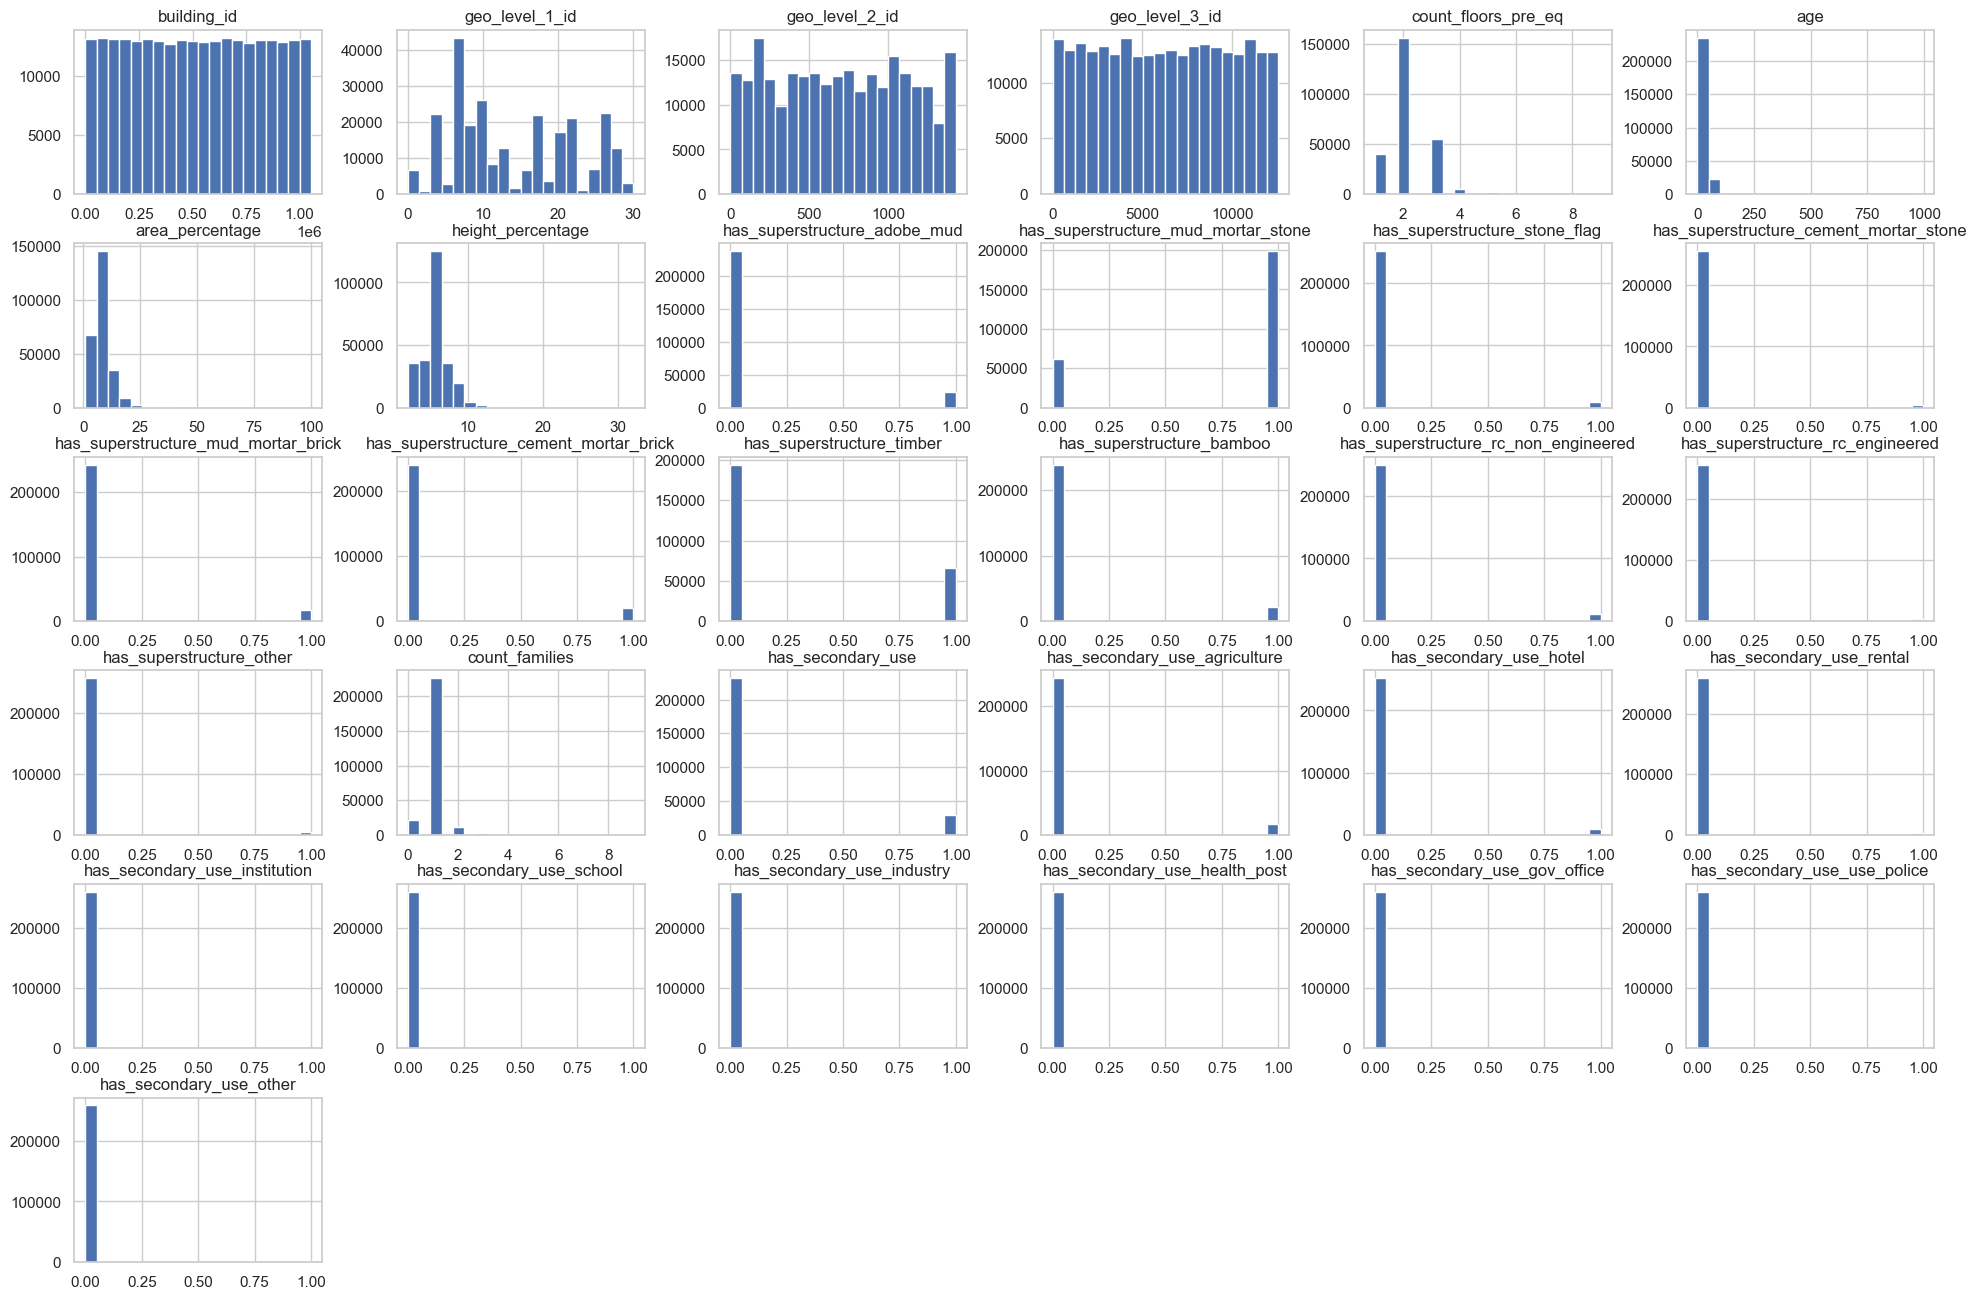

In [ ]:
df_comp_train.hist(figsize=(24, 16), bins=20)
plt.show()


## Korrelation der unabhängigen Variablen

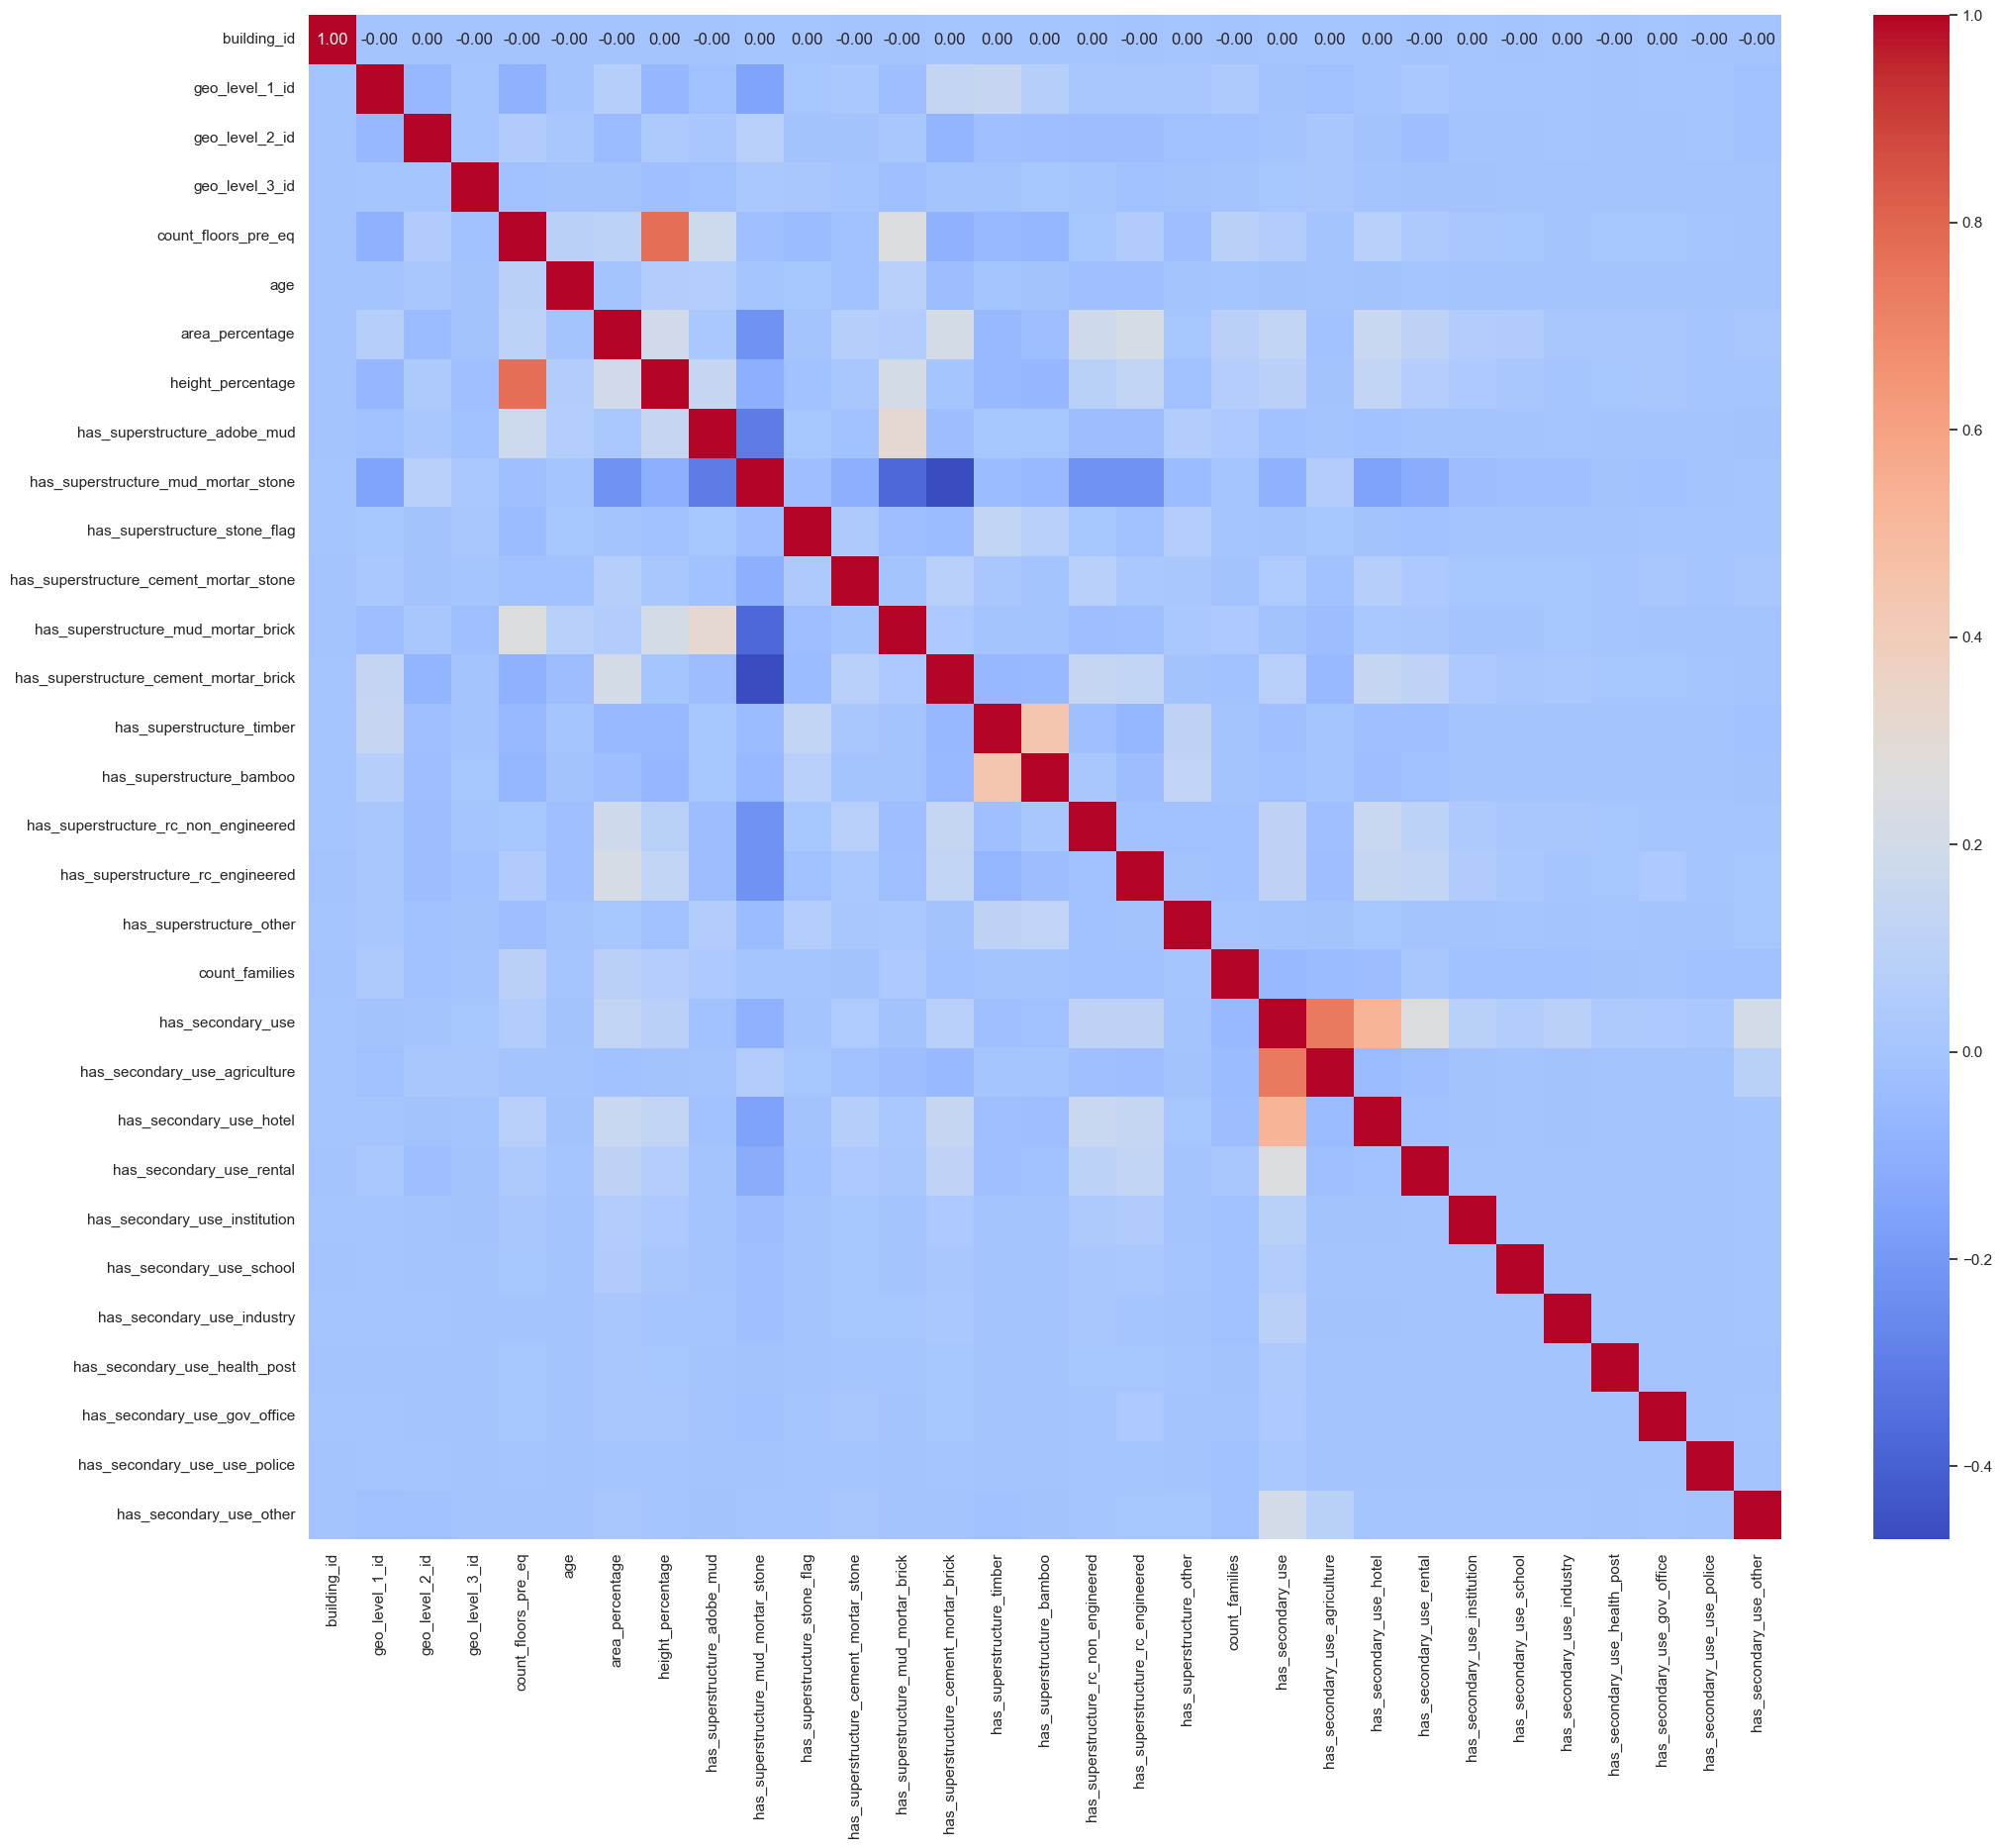

In [ ]:
# Nur numerische Spalten auswählen
numeric_columns = df_comp_train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_comp_train[numeric_columns].corr()

# Reihenfolge der Attribute ändern
columns_order = correlation_matrix.columns
correlation_matrix = correlation_matrix.reindex(columns=columns_order)

# Heatmap erstellen
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()



## Verteilung der Zielvariable

   damage_grade   count
0             2  148259
1             3   87218
2             1   25124


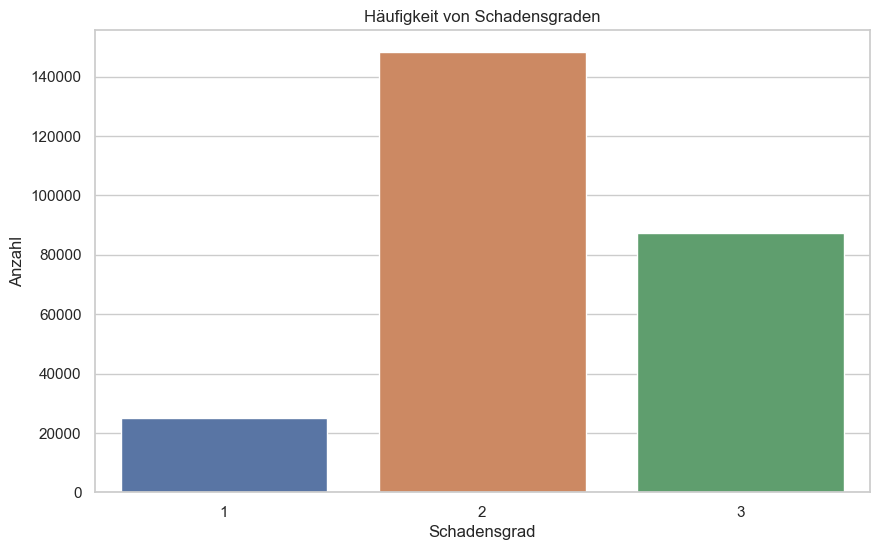

In [ ]:
# Daten vorbereiten: Zähle die Häufigkeit jedes Schadensgrades
df_count = df_comp_labels['damage_grade'].value_counts().reset_index()
df_count.columns = ['damage_grade', 'count']
print(df_count)

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(x='damage_grade', y='count', data=df_count, order=[1, 2, 3])

# Titel und Beschriftungen hinzufügen
plt.title('Häufigkeit von Schadensgraden')
plt.xlabel('Schadensgrad')
plt.ylabel('Anzahl')

plt.show()

## inkonsistente Werte


In [ ]:
def unique_values_per_attribute(data):
    unique_values_dict = {}
    for column in data.columns:
        unique_values_dict[column] = data[column].unique()
    return unique_values_dict

# Beispielaufruf mit Ihrem DataFrame 'df'
unique_values = unique_values_per_attribute(df_comp_train)

# Ausgabe der einzigartigen Werte für jedes Attribut
for column, values in unique_values.items():
    print(f"{column}: {values}")

building_id: [802906  28830  94947 ... 602512 151409 747594]
geo_level_1_id: [ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
geo_level_2_id: [487 900 363 ...  77 115 627]
geo_level_3_id: [12198  2812  8973 ...  3152  5276  3085]
count_floors_pre_eq: [2 3 1 4 5 6 7 8 9]
age: [ 30  10  25   0  15  20  45  55   5  40  80  60  35  70  50  65 100  75
  85 190 995 105  90 120  95 110 115 150 200 130 125 140 155 160 175 135
 145 195 180 165 170 185]
area_percentage: [  6   8   5   9   3  13   7   4  12  16  11  27  10  15  14  17  21  37
  19   2  28  38  56   1  20  24  34  26  18  31  25  23  22  32  47  36
  40  29  42  55  35  39 100  50  51  43  30  62  85  33  45  52  57  49
  67  66  54  75  65  58  48  64  63  46  59  86  78  41  44  61  70  77
  73  72  53  60  84  83  76  96  80  90  82  69]
height_percentage: [ 5  7  9  4  6  3 10  8  2 32 12 11 13 16 15 18 26 17 19 14 20 23 21 25
 24 28 31]
land_surface_condition: ['t' 'o' 'n']
found